In [1]:
import os
from keras import layers
from keras import models
from keras import optimizers
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras import backend as K
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input, decode_predictions
import tensorflow as tf
from keras.layers import Dense, Activation, Flatten

Using TensorFlow backend.


In [2]:
# importing data
base_dir = '/home/minool/Documents/Projects/MachineLearning/HW3/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
# Convnet
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = Flatten(name='flatten')(conv_base.output)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dense(1, activation='sigmoid', name='predictions')(x)

# stitch together
model = models.Model(inputs= conv_base.input, outputs=x)

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
# Fine Tuning
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        layer.trainable = True
    else:
        layer.trainable = False

In [7]:
# compile model

model.compile(
    loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

# train

history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 28s 279ms/step - loss: 0.3010 - acc: 0.8730 - val_loss: 0.1786 - val_acc: 0.9410
Epoch 2/30
100/100 [==============================] - 26s 263ms/step - loss: 0.2739 - acc: 0.8825 - val_loss: 0.1839 - val_acc: 0.9270
Epoch 3/30
100/100 [==============================] - 26s 260ms/step - loss: 0.2875 - acc: 0.8800 - val_loss: 0.1984 - val_acc: 0.9200
Epoch 4/30
100/100 [==============================] - 26s 263ms/step - loss: 0.2500 - acc: 0.8990 - val_loss: 0.1989 - val_acc: 0.9220
Epoch 5/30
100/100 [==============================] - 26s 263ms/step - loss: 0.2530 - acc: 0.9000 - val_loss: 0.1639 - val_acc: 0.9460
Epoch 6/30
100/100 [==============================] - 26s 258ms/step - loss: 0.2325 - acc: 0.9015 - val_loss: 0.1813 - val_acc: 0.9250
Epoch 7/30
100/100 [==============================] - 25s 255ms/step - loss: 0.2462 - acc: 0.8980 - val_loss: 0.1616 - val_acc: 0.9440
Epoch 8/30
100/100 [==============================] - 2

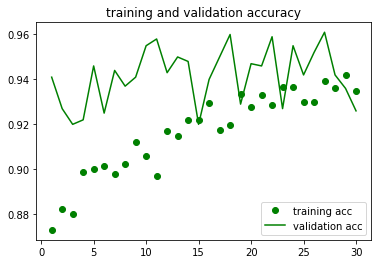

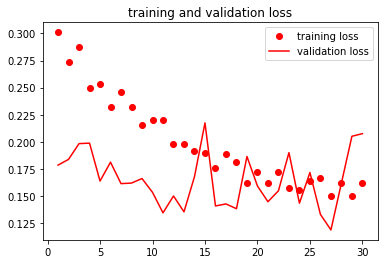

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'go', label='training acc')
plt.plot(epochs, val_acc, 'g', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'ro', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [9]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

('Validation loss:', 0.17187768438830972)
('Validation accuracy:', 0.9389999902248383)
